In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('~/Documents/Titanic_project'):

    for filename in filenames:
        print(os.path.join(dirname, filename))


In [2]:
#IMPORT LIBRARIES
import seaborn as sns #library visualization
import matplotlib.pyplot as plt


In [3]:
#LOAD THE DATA

df_train = pd.read_csv('~/Documents/Titanic_project/titanicproject/train.csv')
df_test = pd.read_csv('~/Documents/Titanic_project/titanicproject/test.csv')



In [4]:
df_test.head(5)

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

In [5]:
df_train.head(10)


PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy J    male  54.0      0   
7                     Palsson, Master. Gosta Leonard    male   2.0      3   
8  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
5      0            330877   8.4583   NaN        Q  
6      0             17463  51.8625   E46        S  
7      1            349909  21.0750   NaN        S  
8      2            347742  11.1333   NaN        S  
9      0            237736  30.0708   NaN        C

In [6]:
#Wrangle, prepare, cleanse the data

In [7]:
print("Columns with missing values: ")
print(df_train.columns[df_train.isnull().any()].tolist())

Columns with missing values: 
['Age', 'Cabin', 'Embarked']


In [8]:
#Find columns with Nans in them
print("Columns with missing values: ")
print(df_test.columns[df_test.isnull().any()].tolist())

Columns with missing values: 
['Age', 'Fare', 'Cabin']


In [9]:
print(df_train.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [10]:
print(df_test.isnull().sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [11]:
# 3 ways to handle null values

#1.Remove NaN rows 
#2.Set NaN to hard coded value 
#3.Impute NaN values based on other rows


In [12]:
print("Before dropping - " + str(len(df_train)) + " rows")
df_train = df_train[~df_train['Embarked'].isna()]
print("After dropping - " + str(len(df_train)) + " rows")

Before dropping - 891 rows
After dropping - 889 rows


In [13]:
mean_fare = df_test['Fare'].mean()
print("Mean value of fare = " + str(mean_fare))
print("NA count before fill = " + str(len(df_test[df_test['Fare'].isna()])))
df_test['Fare'] = df_test['Fare'].fillna(mean_fare)
print("NA count after fill = " + str(len(df_test[df_test['Fare'].isna()])))

Mean value of fare = 35.627188489208635
NA count before fill = 1
NA count after fill = 0


In [14]:
print(df_test.isnull().sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


In [15]:
mean_age = df_train['Age'].mean()
print("Mean age of passengers = " + str(mean_age))
print("NA count before fill = " + str(len(df_train[df_train['Age'].isna()])))
df_train['Age'] = df_train['Age'].fillna(mean_age)
print("NA count after fill = " + str(len(df_train[df_train['Age'].isna()])))

Mean age of passengers = 29.64209269662921
NA count before fill = 177
NA count after fill = 0


In [16]:
mean_age = df_test['Age'].mean()
print("Mean age of passengers = " + str(mean_age))
print("NA count before fill = " + str(len(df_test[df_test['Age'].isna()])))
df_test['Age'] = df_test['Age'].fillna(mean_age)
print("NA count after fill = " + str(len(df_test[df_test['Age'].isna()])))

Mean age of passengers = 30.272590361445783
NA count before fill = 86
NA count after fill = 0


In [17]:
#Statistical distribution
df_train.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   889.000000  889.000000  889.000000  889.000000  889.000000   
mean    446.000000    0.382452    2.311586   29.642093    0.524184   
std     256.998173    0.486260    0.834700   12.968346    1.103705   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     224.000000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   29.642093    0.000000   
75%     668.000000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  889.000000  889.000000  
mean     0.382452   32.096681  
std      0.806761   49.697504  
min      0.000000    0.000000  
25%      0.000000    7.895800  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

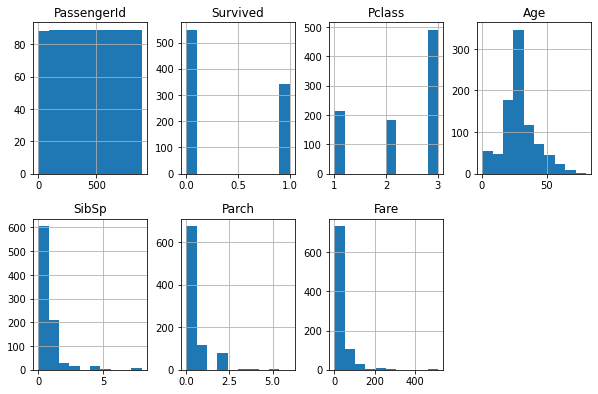

In [18]:
hist = df_train.hist(figsize=(10,10),layout=(3,4))


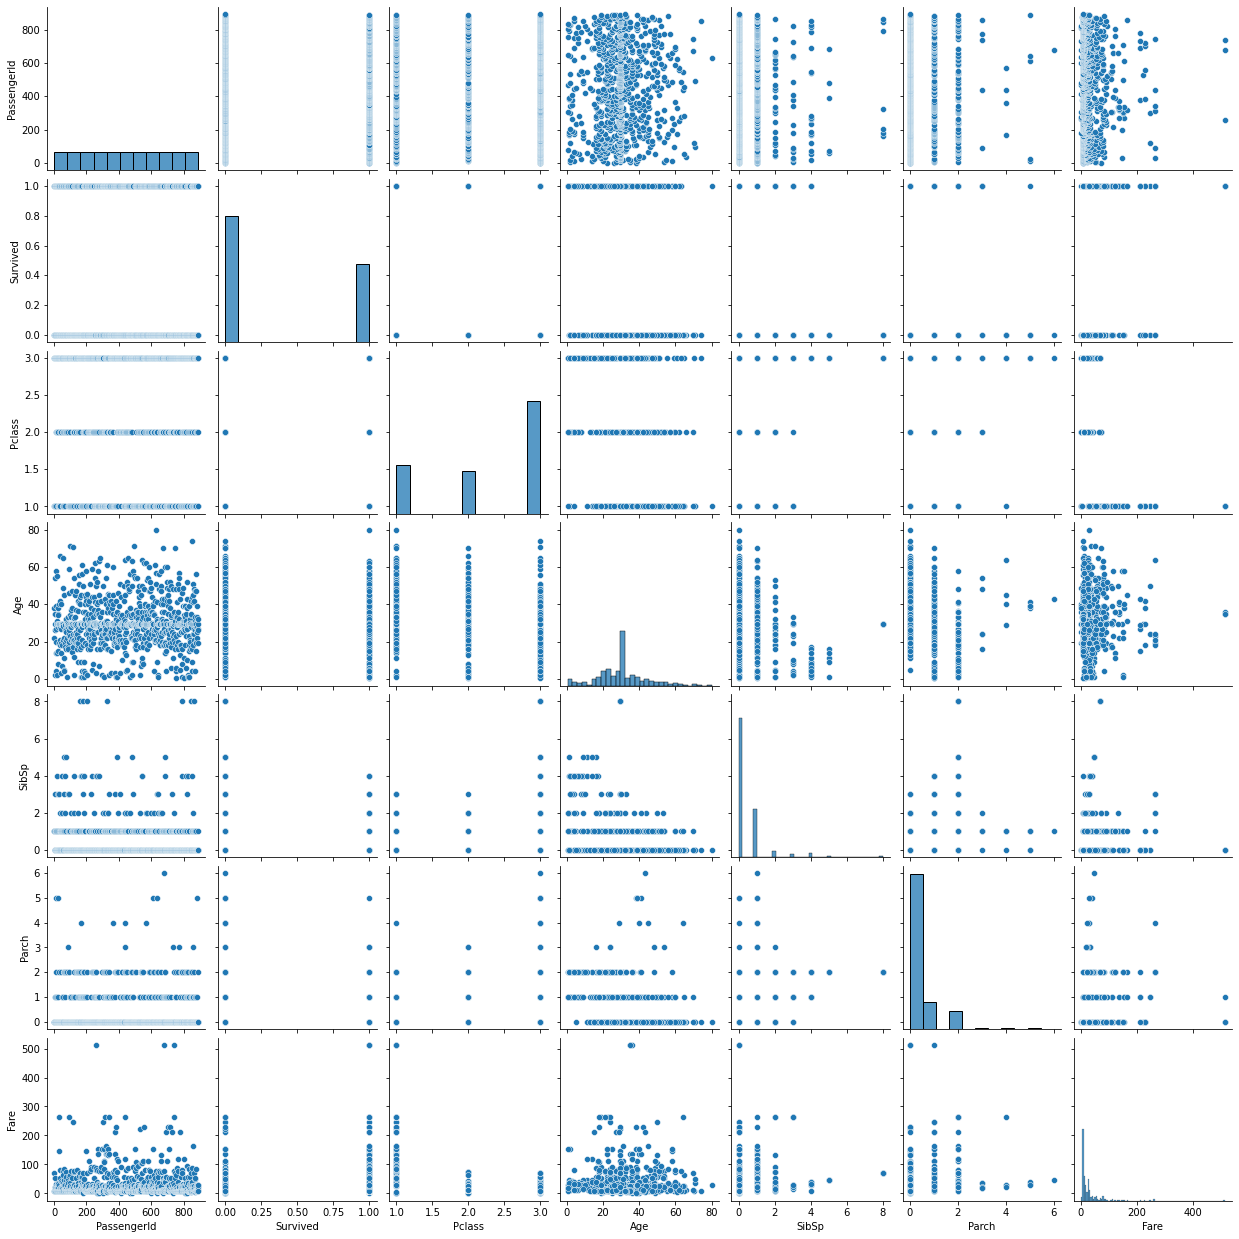

In [19]:
sns.pairplot(df_train)
plt.show()

In [20]:
corr=df_train.corr()

corr.style.background_gradient(cmap='coolwarm')



Correaltions observed in Titanic:

Pclass and Fare Age and Parch Age and SibSp Age and Pclass Pclass and Survived

In [21]:
df_train['RelativeCount'] = df_train['SibSp'] + df_train['Parch']
df_test['RelativeCount'] = df_test['SibSp'] + df_test['Parch']
df_train['RelativeCount'].describe()
df_test.head(5)


PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  RelativeCount  
0  34.5      0      0   330911   7.8292   NaN        Q              0  
1  47.0      1      0   363272   7.0000   NaN        S              1  
2  62.0      0      0   240276   9.6875   NaN        Q              0  
3  27.0      0      0   315154   8.6625   NaN        S              0  
4  22.0      1      1  3101298  12.2875   NaN        S              2

In [22]:
df_train.head(5)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  RelativeCount  
0      0         A/5 21171   7.2500   NaN        S              1  
1      0          PC 17599  71.2833   C85        C              1  
2      0  STON/O2. 3101282   7.9250   NaN        S              0  
3      0            113803  53.1000  C123        S              1  
4      0            373450   8.0500   NaN        S              0

Was a passenger travelling alone?

Use numpy.where(): Return elements chosen from x or y depending on condition. https://docs.scipy.org/doc/numpy/reference/generated/numpy.where.html

In [23]:
df_train['TravelAlone'] = np.where(df_train['SibSp']+df_train['Parch']>0, 0, 1)
df_test['TravelAlone'] = np.where(df_test['SibSp']+df_test['Parch']>0, 0, 1)
# No - 0 , YES - 1
df_train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  RelativeCount  TravelAlone  
0      0         A/5 21171   7.2500   NaN        S              1            0  
1      0          PC 17599  71.2833   C85        C              1            0  
2      0  STON/O2. 3101282   7.9250   NaN        S              0            1  
3      0            113803  53.1000  C123        S              1            0  
4      0            373450   8.0500   NaN        S              0            1

TRAIN:


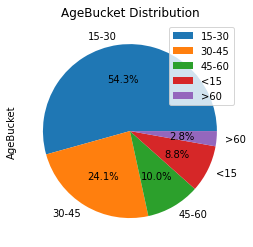

In [24]:
#AGEBUCKETING
def bucket_age(age):
  if age < 15:
    return "<15"
  if age >= 15 and age < 30:
    return "15-30"
  if age >=30 and age < 45:
    return "30-45"
  if age>=45 and age < 60:
    return "45-60"
  return ">60"

df_train['AgeBucket'] = df_train['Age'].apply(bucket_age)
df_test['AgeBucket'] = df_test['Age'].apply(bucket_age)

#Visualising with a pie chart
print('TRAIN:')
pie = df_train['AgeBucket'].value_counts().plot(kind="pie",title='AgeBucket Distribution',legend=True,autopct='%1.1f%%')


TEST:


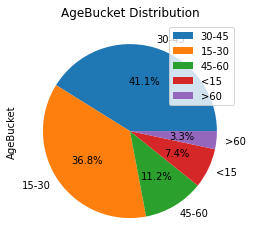

In [25]:
print('TEST:')
pie_test = df_test['AgeBucket'].value_counts().plot(kind="pie",title='AgeBucket Distribution',legend=True,autopct='%1.1f%%')

In [26]:
# NAME

# Name Length
df_train['Name_Length'] = df_train['Name'].apply(lambda x : len(x))
df_train['Name_Length'] = (df_train.Name_Length).astype(np.int64)+1



<AxesSubplot:xlabel='Name_Length', ylabel='Survived'>

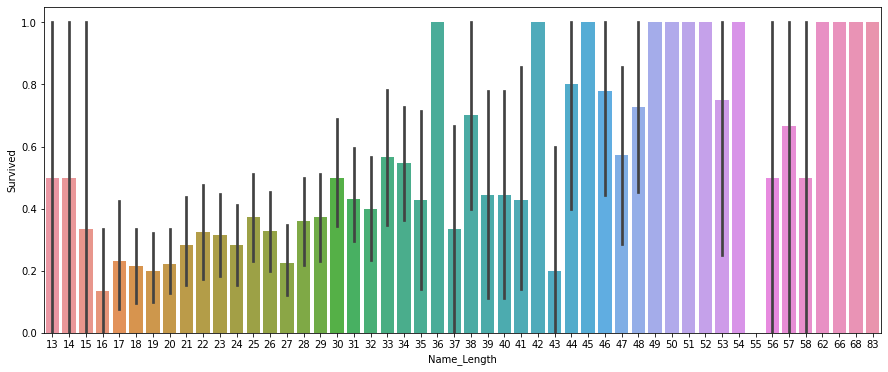

In [27]:

plt.subplots(figsize=(15, 6))
sns.barplot(data=df_train,x='Name_Length',y='Survived')

In [28]:
df_test['Name_Length'] = df_test['Name'].apply(lambda x : len(x))
df_test['Name_Length'] = (df_test.Name_Length).astype(np.int64)+1

print(df_test['Name_Length'])


0      17
1      33
2      26
3      17
4      45
       ..
413    19
414    29
415    29
416    20
417    25
Name: Name_Length, Length: 418, dtype: int64


In [29]:
# EXTRACTING TITLE FROM A NAME (TRAIN)
title = df_train.Name.values
import re
for i,t in enumerate(title):
    r = re.search(',([A-Za-z ]*)',t)
    title[i] = r.group(1)


In [30]:
# EXTRACTING TITLE FORM NAME (TEST)
title = df_test.Name.values
import re
for i,t in enumerate(title):
    r = re.search(',([A-Za-z ]*)',t)
    title[i] = r.group(1)


In [31]:
all_data = pd.concat([df_train, df_test])
all_data.tail(10)

PassengerId  Survived  Pclass     Name     Sex       Age  SibSp  Parch  \
408         1300       NaN       3     Miss  female  30.27259      0      0   
409         1301       NaN       3     Miss  female   3.00000      1      1   
410         1302       NaN       3     Miss  female  30.27259      0      0   
411         1303       NaN       1      Mrs  female  37.00000      1      0   
412         1304       NaN       3     Miss  female  28.00000      0      0   
413         1305       NaN       3       Mr    male  30.27259      0      0   
414         1306       NaN       1     Dona  female  39.00000      0      0   
415         1307       NaN       3       Mr    male  38.50000      0      0   
416         1308       NaN       3       Mr    male  30.27259      0      0   
417         1309       NaN       3   Master    male  30.27259      1      1   

                 Ticket      Fare Cabin Embarked  RelativeCount  TravelAlone  \
408              334915    7.7208   NaN        Q              0            1   
409  SOTON/O.Q. 3101315   13.7750   NaN        S              2            0   
410              365237    7.7500   NaN        Q              0            1   
411               19928   90.0000   C78        Q              1            0   
412              347086    7.7750   NaN        S              0            1   
413           A.5. 3236    8.0500   NaN        S              0            1   
414            PC 17758  108.9000  C105        C              0            1   
415  SOTON/O.Q. 3101262    7.2500   NaN        S              0            1   
416              359309    8.0500   NaN        S              0            1   
417                2668   22.3583   NaN        C              2            0   

    AgeBucket  Name_Length  
408     30-45           32  
409       <15           26  
410     30-45           23  
411     30-45           48  
412     15-30           31  
413     30-45           19  
414     30-45           29  
415     30-45           29  
416     30-45           20  
417     30-45           25

In [32]:
# SEX -LABEL ENCODING + ONE HOT ENCODING
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
trained_le = le.fit(all_data.Sex)
df_train['Sex'] = trained_le.transform(df_train.Sex)
df_test['Sex'] = trained_le.transform(df_test.Sex)


In [33]:
# EMBARKED -LABEL ENCODING

le = preprocessing.LabelEncoder()
trained_le = le.fit(all_data.Embarked)
df_train['Embarked'] = trained_le.transform(df_train.Embarked)
df_test['Embarked'] = trained_le.transform(df_test.Embarked)


In [34]:
# AGE_BUCKET - LABEL ENCODING

le = preprocessing.LabelEncoder()
trained_le = le.fit(all_data.AgeBucket)
df_train['AgeBucket'] = trained_le.transform(df_train.AgeBucket)
df_test['AgeBucket'] = trained_le.transform(df_test.AgeBucket)

In [35]:
agebucket_dummies=pd.get_dummies(df_train.AgeBucket, prefix='AgeBucket')

In [36]:
df_train=pd.concat([df_train,agebucket_dummies],axis=1)

In [37]:
agebucket_dummies=pd.get_dummies(df_test.AgeBucket, prefix='AgeBucket')
df_test=pd.concat([df_test,agebucket_dummies],axis=1)

In [38]:
all_data['Fare'].sort_values(ascending=True)

466      0.0000
481      0.0000
597      0.0000
413      0.0000
633      0.0000
         ...   
341    263.0000
737    512.3292
258    512.3292
679    512.3292
343    512.3292
Name: Fare, Length: 1307, dtype: float64

TRAIN:


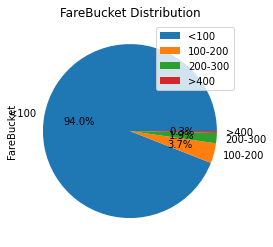

In [39]:
#Fare - bucketing
def bucket_Fare(Fare):
  if Fare < 100:
    return "<100"
  if Fare >= 100 and Fare < 200:
    return "100-200"
  if Fare >=200 and Fare < 300:
    return "200-300"
  if Fare>=300 and Fare < 400:
    return "300-400"
  return ">400"

df_train['FareBucket'] = df_train['Fare'].apply(bucket_Fare)
df_test['FareBucket'] = df_test['Fare'].apply(bucket_Fare)

#Visualize this with a pie chart
print('TRAIN:')
pie = df_train['FareBucket'].value_counts().plot(kind="pie",title='FareBucket Distribution',legend=True,autopct='%1.1f%%')
#pie = df_test['FareBucket'].value_counts().plot(kind="pie",title='FareBucket Distribution',legend=True,autopct='%1.1f%%')


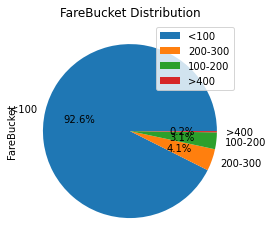

In [40]:
pie = df_test['FareBucket'].value_counts().plot(kind="pie",title='FareBucket Distribution',legend=True,autopct='%1.1f%%')


In [41]:
all_data = pd.concat([df_train, df_test])
all_data.tail(10)

PassengerId  Survived  Pclass     Name  Sex       Age  SibSp  Parch  \
408         1300       NaN       3     Miss    0  30.27259      0      0   
409         1301       NaN       3     Miss    0   3.00000      1      1   
410         1302       NaN       3     Miss    0  30.27259      0      0   
411         1303       NaN       1      Mrs    0  37.00000      1      0   
412         1304       NaN       3     Miss    0  28.00000      0      0   
413         1305       NaN       3       Mr    1  30.27259      0      0   
414         1306       NaN       1     Dona    0  39.00000      0      0   
415         1307       NaN       3       Mr    1  38.50000      0      0   
416         1308       NaN       3       Mr    1  30.27259      0      0   
417         1309       NaN       3   Master    1  30.27259      1      1   

                 Ticket      Fare  ... RelativeCount  TravelAlone  AgeBucket  \
408              334915    7.7208  ...             0            1          1   
409  SOTON/O.Q. 3101315   13.7750  ...             2            0          3   
410              365237    7.7500  ...             0            1          1   
411               19928   90.0000  ...             1            0          1   
412              347086    7.7750  ...             0            1          0   
413           A.5. 3236    8.0500  ...             0            1          1   
414            PC 17758  108.9000  ...             0            1          1   
415  SOTON/O.Q. 3101262    7.2500  ...             0            1          1   
416              359309    8.0500  ...             0            1          1   
417                2668   22.3583  ...             2            0          1   

     Name_Length  AgeBucket_0  AgeBucket_1  AgeBucket_2  AgeBucket_3  \
408           32            0            1            0            0   
409           26            0            0            0            1   
410           23            0            1            0            0   
411           48            0            1            0            0   
412           31            1            0            0            0   
413           19            0            1            0            0   
414           29            0            1            0            0   
415           29            0            1            0            0   
416           20            0            1            0            0   
417           25            0            1            0            0   

     AgeBucket_4  FareBucket  
408            0        <100  
409            0        <100  
410            0        <100  
411            0        <100  
412            0        <100  
413            0        <100  
414            0     100-200  
415            0        <100  
416            0        <100  
417            0        <100  

[10 rows x 22 columns]

In [42]:
# FareBucket - LABEL ENCODING

le = preprocessing.LabelEncoder()
trained_le = le.fit(all_data.FareBucket)
df_train['FareBucket'] = trained_le.transform(df_train.FareBucket)
df_test['FareBucket'] = trained_le.transform(df_test.FareBucket)

In [43]:
df_train.head(5)

PassengerId  Survived  Pclass   Name  Sex   Age  SibSp  Parch  \
0            1         0       3     Mr    1  22.0      1      0   
1            2         1       1    Mrs    0  38.0      1      0   
2            3         1       3   Miss    0  26.0      0      0   
3            4         1       1    Mrs    0  35.0      1      0   
4            5         0       3     Mr    1  35.0      0      0   

             Ticket     Fare  ... RelativeCount  TravelAlone  AgeBucket  \
0         A/5 21171   7.2500  ...             1            0          0   
1          PC 17599  71.2833  ...             1            0          1   
2  STON/O2. 3101282   7.9250  ...             0            1          0   
3            113803  53.1000  ...             1            0          1   
4            373450   8.0500  ...             0            1          1   

   Name_Length  AgeBucket_0  AgeBucket_1  AgeBucket_2  AgeBucket_3  \
0           24            1            0            0            0   
1           52            0            1            0            0   
2           23            1            0            0            0   
3           45            0            1            0            0   
4           25            0            1            0            0   

   AgeBucket_4  FareBucket  
0            0           2  
1            0           2  
2            0           2  
3            0           2  
4            0           2  

[5 rows x 22 columns]

In [44]:
# DUMMY ENCODING

In [45]:
sex_dummies=pd.get_dummies(df_train.Sex, prefix='Sex')
df_train=pd.concat([df_train,sex_dummies],axis=1)

sex_dummies=pd.get_dummies(df_test.Sex, prefix='Sex')
df_test=pd.concat([df_test,sex_dummies],axis=1)


In [46]:
embarked_dummies=pd.get_dummies(df_train.Embarked, prefix='Embarked')
df_train=pd.concat([df_train,embarked_dummies],axis=1)

embarked_dummies=pd.get_dummies(df_test.Embarked, prefix='Embarked')
df_test=pd.concat([df_test,embarked_dummies],axis=1)

In [47]:
New_cabin = df_train['Cabin'].astype(str).str[0]
df = pd.DataFrame(New_cabin)
df



Cabin
0       n
1       C
2       n
3       C
4       n
..    ...
886     n
887     B
888     n
889     C
890     n

[889 rows x 1 columns]

In [48]:
# dropping Cabin
df_train.drop(labels=['Cabin'],axis=1,inplace=True)
df_train=pd.concat([df_train,df],axis=1)
df_train.head(5)



PassengerId  Survived  Pclass   Name  Sex   Age  SibSp  Parch  \
0            1         0       3     Mr    1  22.0      1      0   
1            2         1       1    Mrs    0  38.0      1      0   
2            3         1       3   Miss    0  26.0      0      0   
3            4         1       1    Mrs    0  35.0      1      0   
4            5         0       3     Mr    1  35.0      0      0   

             Ticket     Fare  ...  AgeBucket_2  AgeBucket_3  AgeBucket_4  \
0         A/5 21171   7.2500  ...            0            0            0   
1          PC 17599  71.2833  ...            0            0            0   
2  STON/O2. 3101282   7.9250  ...            0            0            0   
3            113803  53.1000  ...            0            0            0   
4            373450   8.0500  ...            0            0            0   

   FareBucket  Sex_0  Sex_1  Embarked_0  Embarked_1  Embarked_2  Cabin  
0           2      0      1           0           0           1      n  
1           2      1      0           1           0           0      C  
2           2      1      0           0           0           1      n  
3           2      1      0           0           0           1      C  
4           2      0      1           0           0           1      n  

[5 rows x 27 columns]

In [49]:
New_cabin = df_test['Cabin'].astype(str).str[0]
df = pd.DataFrame(New_cabin)
df_test.drop(labels=['Cabin'],axis=1,inplace=True)
df_test=pd.concat([df_test,df],axis=1)
df_test.head(5)

PassengerId  Pclass  Name  Sex   Age  SibSp  Parch   Ticket     Fare  \
0          892       3    Mr    1  34.5      0      0   330911   7.8292   
1          893       3   Mrs    0  47.0      1      0   363272   7.0000   
2          894       2    Mr    1  62.0      0      0   240276   9.6875   
3          895       3    Mr    1  27.0      0      0   315154   8.6625   
4          896       3   Mrs    0  22.0      1      1  3101298  12.2875   

   Embarked  ...  AgeBucket_2  AgeBucket_3  AgeBucket_4  FareBucket  Sex_0  \
0         1  ...            0            0            0           2      0   
1         2  ...            1            0            0           2      1   
2         1  ...            0            0            1           2      0   
3         2  ...            0            0            0           2      0   
4         2  ...            0            0            0           2      1   

   Sex_1  Embarked_0  Embarked_1  Embarked_2  Cabin  
0      1           0           1           0      n  
1      0           0           0           1      n  
2      1           0           1           0      n  
3      1           0           0           1      n  
4      0           0           0           1      n  

[5 rows x 26 columns]

In [50]:
New_cabin = all_data['Cabin'].astype(str).str[0]
df = pd.DataFrame(New_cabin)
all_data.drop(labels=['Cabin'],axis=1,inplace=True)
all_data=pd.concat([all_data,df],axis=1)
all_data.head(5)

PassengerId  Survived  Pclass   Name  Sex   Age  SibSp  Parch  \
0            1       0.0       3     Mr    1  22.0      1      0   
1            2       1.0       1    Mrs    0  38.0      1      0   
2            3       1.0       3   Miss    0  26.0      0      0   
3            4       1.0       1    Mrs    0  35.0      1      0   
4            5       0.0       3     Mr    1  35.0      0      0   

             Ticket     Fare  ...  TravelAlone  AgeBucket  Name_Length  \
0         A/5 21171   7.2500  ...            0          0           24   
1          PC 17599  71.2833  ...            0          1           52   
2  STON/O2. 3101282   7.9250  ...            1          0           23   
3            113803  53.1000  ...            0          1           45   
4            373450   8.0500  ...            1          1           25   

   AgeBucket_0  AgeBucket_1  AgeBucket_2  AgeBucket_3  AgeBucket_4  \
0            1            0            0            0            0   
1            0            1            0            0            0   
2            1            0            0            0            0   
3            0            1            0            0            0   
4            0            1            0            0            0   

   FareBucket  Cabin  
0        <100      n  
1        <100      C  
2        <100      n  
3        <100      C  
4        <100      n  

[5 rows x 22 columns]

In [51]:
all_data.Cabin.unique()

array(['n', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [52]:
Temp_dict = {'n' : 1, 'C' : 7, 'E': 5, 'G': 4, 'D': 6, 'A': 9, 'B': 8, 'F': 3 , 'T': 2}
df_train['NewCabin'] = df_train.Cabin.map(Temp_dict)
df_train

PassengerId  Survived  Pclass   Name  Sex        Age  SibSp  Parch  \
0              1         0       3     Mr    1  22.000000      1      0   
1              2         1       1    Mrs    0  38.000000      1      0   
2              3         1       3   Miss    0  26.000000      0      0   
3              4         1       1    Mrs    0  35.000000      1      0   
4              5         0       3     Mr    1  35.000000      0      0   
..           ...       ...     ...    ...  ...        ...    ...    ...   
886          887         0       2    Rev    1  27.000000      0      0   
887          888         1       1   Miss    0  19.000000      0      0   
888          889         0       3   Miss    0  29.642093      1      2   
889          890         1       1     Mr    1  26.000000      0      0   
890          891         0       3     Mr    1  32.000000      0      0   

               Ticket     Fare  ...  AgeBucket_3  AgeBucket_4  FareBucket  \
0           A/5 21171   7.2500  ...            0            0           2   
1            PC 17599  71.2833  ...            0            0           2   
2    STON/O2. 3101282   7.9250  ...            0            0           2   
3              113803  53.1000  ...            0            0           2   
4              373450   8.0500  ...            0            0           2   
..                ...      ...  ...          ...          ...         ...   
886            211536  13.0000  ...            0            0           2   
887            112053  30.0000  ...            0            0           2   
888        W./C. 6607  23.4500  ...            0            0           2   
889            111369  30.0000  ...            0            0           2   
890            370376   7.7500  ...            0            0           2   

     Sex_0  Sex_1  Embarked_0  Embarked_1  Embarked_2  Cabin  NewCabin  
0        0      1           0           0           1      n         1  
1        1      0           1           0           0      C         7  
2        1      0           0           0           1      n         1  
3        1      0           0           0           1      C         7  
4        0      1           0           0           1      n         1  
..     ...    ...         ...         ...         ...    ...       ...  
886      0      1           0           0           1      n         1  
887      1      0           0           0           1      B         8  
888      1      0           0           0           1      n         1  
889      0      1           1           0           0      C         7  
890      0      1           0           1           0      n         1  

[889 rows x 28 columns]

In [53]:
df_test['NewCabin'] = df_test.Cabin.map(Temp_dict)
df_test

PassengerId  Pclass     Name  Sex       Age  SibSp  Parch  \
0            892       3       Mr    1  34.50000      0      0   
1            893       3      Mrs    0  47.00000      1      0   
2            894       2       Mr    1  62.00000      0      0   
3            895       3       Mr    1  27.00000      0      0   
4            896       3      Mrs    0  22.00000      1      1   
..           ...     ...      ...  ...       ...    ...    ...   
413         1305       3       Mr    1  30.27259      0      0   
414         1306       1     Dona    0  39.00000      0      0   
415         1307       3       Mr    1  38.50000      0      0   
416         1308       3       Mr    1  30.27259      0      0   
417         1309       3   Master    1  30.27259      1      1   

                 Ticket      Fare  Embarked  ...  AgeBucket_3  AgeBucket_4  \
0                330911    7.8292         1  ...            0            0   
1                363272    7.0000         2  ...            0            0   
2                240276    9.6875         1  ...            0            1   
3                315154    8.6625         2  ...            0            0   
4               3101298   12.2875         2  ...            0            0   
..                  ...       ...       ...  ...          ...          ...   
413           A.5. 3236    8.0500         2  ...            0            0   
414            PC 17758  108.9000         0  ...            0            0   
415  SOTON/O.Q. 3101262    7.2500         2  ...            0            0   
416              359309    8.0500         2  ...            0            0   
417                2668   22.3583         0  ...            0            0   

     FareBucket  Sex_0  Sex_1  Embarked_0  Embarked_1  Embarked_2  Cabin  \
0             2      0      1           0           1           0      n   
1             2      1      0           0           0           1      n   
2             2      0      1           0           1           0      n   
3             2      0      1           0           0           1      n   
4             2      1      0           0           0           1      n   
..          ...    ...    ...         ...         ...         ...    ...   
413           2      0      1           0           0           1      n   
414           0      1      0           1           0           0      C   
415           2      0      1           0           0           1      n   
416           2      0      1           0           0           1      n   
417           2      0      1           1           0           0      n   

     NewCabin  
0           1  
1           1  
2           1  
3           1  
4           1  
..        ...  
413         1  
414         7  
415         1  
416         1  
417         1  

[418 rows x 27 columns]

In [54]:
# DROPPING COLUMNS: CABIN, TICKET, FARE, SEX, NAME, EMBARKED, AGEBUCKET
df_train.drop(labels=['Cabin','Ticket','Fare','Sex', 'Name', 'Embarked', 'AgeBucket' ],axis=1,inplace=True)
df_test.drop(labels=['Cabin','Ticket','Fare','Sex','Name', 'Embarked', 'AgeBucket'],axis=1,inplace=True)

In [55]:
#DIVIDING THE DATA INTO Y_TRAIN AND X_TRAIN AND CONVERTING THEM INTO NP ARRAYS
y_train = df_train.loc[:,'Survived'].values
x_train =df_train.drop(['Survived'],axis=1).values
x_test = df_test.values

# Confusion Matrix
from sklearn.metrics import confusion_matrix
dict_K = {}
dic = {}

#Kfold Validation
def get_acc(Xtrain,Ytrain,model):
    from sklearn.model_selection import KFold
    acc = []
    k=KFold(n_splits=4)
    for train , test in k.split(Xtrain,y=Ytrain):
        x_train = Xtrain[train,:]
        y_train = Ytrain[train]
        x_test = Xtrain[test,:]
        y_test = Ytrain[test]
        model.fit(x_train,y_train)
        y_pred = model.predict(x_test)
        cm = confusion_matrix(y_true=y_test,y_pred=y_pred)
        acc.append((cm[1,1]+cm[0,0])/((cm[1,0]+cm[0,1]+cm[1,1]+cm[0,0])+1e-5))
    return acc

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100,criterion='entropy')
dict_K['Random_forest'] = get_acc(x_train,y_train,classifier)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

In [56]:
df_F = pd.DataFrame(dict_K)

In [57]:
df_F.mean()


Random_forest    0.818911
dtype: float64

In [58]:
y_pred.shape

(418,)

In [59]:
p = df_test.PassengerId
p = pd.concat([p,pd.DataFrame(y_pred.astype(np.int64),columns=['Survived'])],axis=1)
p.to_csv('Surv_predF.csv',index=False)